# Getting Started with the Google API

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/language/getting-started/intro_palm_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>


## Overview

### What are LLMs?
Large language models (LLMs) are deep learning models trained on massive datasets of text. LLMs can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems.


For more information, check out the [documentation on generative AI support for Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview).

### Objectives

In this tutorial, you’ll learn to use the PaLM API through Google Studio to explore and fine-tune Gemini models for text generation and embedding tasks.

By the end of the notebook, you’ll understand the impact of key parameters—like temperature, top_k, and top_p—and how to adjust them to tailor the AI’s responses to suit your needs.

The steps covered include:

	•	Accessing the PaLM API in Google Studio
	•	Working with Gemini models:
	•	Text generation with gemini-1.5-xxx (exploring parameters like temperature, max_output_token, top_k, and top_p)
	•	Embeddings models for tasks like semantic similarity and search

This tutorial will equip you with practical skills to control and customize responses from Google’s Gemini models, enabling you to build applications with nuanced, adaptive AI outputs.
  

### Responsible AI
Large language models (LLMs) can translate language, summarize text, generate creative writing, generate code, power chatbots and virtual assistants, and complement search engines and recommendation systems. At the same time, as an early-stage technology, its evolving capabilities and uses create potential for misapplication, misuse, and unintended or unforeseen consequences. Large language models can generate output that you don't expect, including text that's offensive, insensitive, or factually incorrect.

What's more, the incredible versatility of LLMs is also what makes it difficult to predict exactly what kinds of unintended or unforeseen outputs they might produce. Given these risks and complexities, the PaLM API is designed with [Google's AI Principles](https://ai.google/principles/) in mind. However, it is important for developers to understand and test their models to deploy safely and responsibly. To aid developers, the Generative AI Studio has built-in content filtering, and the PaLM API has safety attribute scoring to help customers test Google's safety filters and define confidence thresholds that are right for their use case and business. Please refer to the [Safety filters and attributes](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#safety_filters_and_attributes) section to learn more.

When the PaLM API is integrated into a customer's unique use case and context, additional responsible AI considerations and [PaLM limitations](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/responsible-ai#palm_limitations) may need to be considered. We encourage customers to leverage fairness, interpretability, privacy and security [recommended practices](https://ai.google/responsibilities/responsible-ai-practices/).

## Getting Started

### Install Vertex AI SDK

In [ ]:
# !pip install google-cloud-aiplatform

**Colab only:** Uncomment the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [1]:
# Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticating your notebook environment
* If you are using **Colab** to run this notebook, uncomment the cell below and continue.
* If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [ ]:
# !pip install google.colab

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

Google API

I'll help you rewrite this for Google AI Studio API, taking into account the models shown in your screenshots. Here's the updated version:

### Model Overview
Google AI Studio allows you to access and work with Google's advanced language models through their API. There are currently three main model families:

### Gemini Models
The Gemini family represents Google's most advanced multimodal models:
- **Gemini 1.5 Pro**: Latest version of the Pro model
  - `gemini-1.5-pro`
  - `gemini-1.5-pro-002` (NEW)
  - Experimental version: `gemini-1.5-pro-exp-0827`

- **Gemini 1.5 Flash**: Optimized for faster response times
  - `gemini-1.5-flash`
  - `gemini-1.5-flash-002` (NEW)
  - `gemini-1.5-flash-8b` (NEW)
  - Experimental versions:
    - `gemini-1.5-flash-exp-0827`
    - `gemini-1.5-flash-8b-exp-0924`

- **Legacy Models**:
  - `gemini-1.0-pro`

### Gemma Models
Gemma represents a family of lightweight, open models:
- `gemma-2-2b-it` (PREVIEW)
- `gemma-2-9b-it` (PREVIEW)
- `gemma-2-27b-it` (PREVIEW)

### Model Selection Guide
- **Gemini 1.5 Pro**: Best for complex tasks requiring deep understanding and reasoning
- **Gemini 1.5 Flash**: Optimized for faster responses while maintaining good quality
- **Gemini 1.5 Flash-8B**: Lightweight version for simpler tasks
- **Gemma Models**: Open models suitable for local deployment and customization

### Model Naming Convention
Models follow the format:
`<model family>-<version>-<variant>[-<size>][-<additional tags>]`

For example:
- `gemini-1.5-pro-002`: Gemini family, version 1.5, Pro variant, version 002
- `gemma-2-9b-it`: Gemma family, version 2, 9B parameter size, instruction-tuned

Note: Models marked as "NEW" are recent releases, while "PREVIEW" indicates models that are still in testing phase.

You can find more information about the properties of these [foundational models in the Generative AI Studio documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#foundation_models).


### Import libraries

**Colab only:** Uncomment the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.  

In [ ]:
# import vertexai

# PROJECT_ID = ""  # @param {type:"string"}
# vertexai.init(project=PROJECT_ID, location="us-central1")

2023-12-05 16:04:23.911996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 16:04:30.851819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-12-05 16:04:30.853067: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [1]:
!pip install pandas seaborn

In [2]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.metrics.pairwise import cosine_similarity
from vertexai.language_models import TextGenerationModel, \
                                     TextEmbeddingModel, \
                                     ChatModel, \
                                     InputOutputTextPair, \
                                     CodeGenerationModel, \
                                     CodeChatModel

## Text generation with `Gemini Flash 1.5`

The text generation model from  API that you will use in this notebook is `Gemini Flash 1.5`.
It is fine-tuned to follow natural language instructions and is suitable for a variety of language tasks, such as:

- Classification
- Sentiment analysis
- Entity extraction
- Extractive question-answering
- Summarization
- Re-writing text in a different style
- Ad copy generation
- Concept ideation
- Concept simplification

#### Load model

In [3]:
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
import pandas as pd
from vertexai.language_models import TextGenerationModel
import google.generativeai as genai
import os

generation_config = {
    "temperature": 0.2,
    "max_output_tokens": 1024,
    "top_k": 40,
    "top_p": 0.8
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

#### Prompt design
Prompt design is the process of creating prompts that elicit the desired response from a language model. Prompt design is an important part of using language models because it allows non-specialists to control the output of the model with minimal overhead. By carefully crafting the prompts, you can nudge the model to generate a desired result. Prompt design can be an efficient way to experiment with adapting an LLM for a specific use case. The iterative process of repeatedly updating prompts and assessing the model’s responses is sometimes called prompt engineering.

#### Hello Gemini

Create your first prompt and send it to the text generation model.

In [5]:
prompt = "What is a large language model?"

response = model.generate_content(prompt)
print(response.text)

A large language model (LLM) is a type of artificial intelligence (AI) that excels at understanding and generating human-like text. It's essentially a sophisticated statistical model trained on massive amounts of text data, allowing it to learn patterns, relationships, and nuances of language.

Here's a breakdown of key aspects:

**What it does:**

* **Generates text:** LLMs can write stories, poems, articles, code, and even translate languages.
* **Summarizes text:** They can condense large amounts of information into concise summaries.
* **Answers questions:** LLMs can provide informative answers based on their training data.
* **Predicts text:** They can predict the next word in a sentence or the next sentence in a paragraph.
* **Identifies patterns:** LLMs can analyze text to find trends, themes, and relationships.

**How it works:**

* **Training:** LLMs are trained on massive datasets of text, like books, articles, code, and websites. This training process involves feeding the mo

#### Try out your own prompt

- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in the retail industry?
- (Try your own prompts!)

In [6]:
prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words.""" # try your own prompt

response = model.generate_content(prompt)
print(response.text)

Here are 10 tech trends in under 5 words:

1.  AI-powered everything
2.  The metaverse is coming
3.  Quantum computing advances
4.  Edge computing takes off
5.  Sustainable tech solutions
6.  Hyper-personalization reigns
7.  Data privacy concerns grow
8.  Web3 adoption accelerates
9.  Cybersecurity threats evolve
10.  The future of work shifts 



#### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings.

In [7]:
my_industry = "tech" # try changing this to a different industry

prompt = f"""Create a numbered list of 10 items. Each item in the list should
be a trend in the {my_industry} industry.

Each trend should be less than 5 words."""

response = model.generate_content(prompt)
print(response.text)

Here are 10 tech trends in under 5 words:

1. AI-powered everything
2. Metaverse adoption grows
3. Web3 takes center stage
4. Quantum computing advances
5. Cybersecurity threats escalate
6. Edge computing expands
7. 5G networks accelerate
8. Sustainability in tech
9. Data privacy concerns rise
10. Automation reshapes jobs 



### Model parameters for `Gemini Flash 1.5`

You can customize how the model behaves in response to your prompt by using the following parameters for `Gemini Flash`:

 - `temperature`: higher means more "creative" responses
 - `max_output_tokens`: sets the max number of tokens in the output
 - `top_p`: higher means it will pull from more possible next tokens, based on cumulative probability
 - `top_k`: higher means it will sample from more possible next tokens

The section below covers each parameter and how to use them.

#### The `temperature` parameter (range: 0.0 - 1.0, default 0)

##### What is _temperature_?
The temperature is used for sampling during the response generation, which occurs when top_p and top_k are applied. Temperature controls the degree of randomness in token selection.

##### How does _temperature_ affect the response?
Lower temperatures are good for prompts that require a more deterministic and less open-ended response. In comparison, higher temperatures can lead to more "creative" or diverse results. A temperature of `0` is deterministic: the highest probability response is always selected. For most use cases, try starting with a temperature of `0.2`.

A higher temperature value will result in a more exploratative output, with a higher likelihood of generating rare or unusual words or phrases. Conversely, a lower temperature value will result in a more conservative output, with a higher likelihood of generating common or expected words or phrases.

##### Example:

For example,

`temperature = 0.0`:

* _The cat sat on the couch, watching the birds outside._
* _The cat sat on the windowsill, basking in the sun._

`temperature = 0.9`:

* _The cat sat on the moon, meowing at the stars._
* _The cat sat on the cheeseburger, purring with delight._

**Note**: It's important to note that while the temperature parameter can help generate more diverse and interesting text, it can also increase the likelihood of generating nonsensical or inappropriate text (i.e. hallucinations). Therefore, it's important to use it carefully and with consideration for the desired outcome.

For more information on the `temperature` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

If you run the following cell multiple times, it should always return the same response, as `temperature=0` is deterministic.

In [ ]:
# Define temperature values for comparison
temperature_values = [0.2, 0.5, 1.0, 1.5]

# Base configuration for generation, with placeholders for temperature
generation_config = {
    "max_output_tokens": 1024,
    "top_k": 40,
    "top_p": 0.8
}

# Define a prompt for the model
prompt = "Complete the sentence: When I opened my toolkit, I was surprised to find:"

# Loop through each temperature and generate a response
for temp_val in temperature_values:
    # Update the configuration with the current temperature
    generation_config["temperature"] = temp_val

    # Generate response using the model
    response = model.generate_content(prompt, generation_config=generation_config)

    # Print the temperature setting and corresponding response
    print(f"[Temperature = {temp_val}]")
    print(response.text)
    print("\n" + "-"*50 + "\n")

[Temperature = 0.2]
When I opened my toolkit, I was surprised to find **a perfectly preserved, antique compass nestled amongst the wrenches and screwdrivers.** 


--------------------------------------------------

[Temperature = 0.5]
When I opened my toolkit, I was surprised to find **a perfectly preserved, antique screwdriver with a gleaming, mahogany handle.** 


--------------------------------------------------

[Temperature = 1.0]
... a miniature tea set nestled amongst the wrenches and screwdrivers. 


--------------------------------------------------

[Temperature = 1.5]
When I opened my toolkit, I was surprised to find **a perfectly preserved, hand-drawn map of the neighborhood from my childhood, tucked inside the wrench compartment.** 


--------------------------------------------------



#### The `max_output_tokens` parameter (range: 1 - 1024, default 128)

##### Tokens
A single token may be smaller than a word. For example, a token is approximately four characters. So 100 tokens correspond to roughly 60-80 words. It's essential to be aware of the token sizes as models have a limit on input and output tokens.

##### What is _max_output_tokens_?
`max_output_tokens` is the maximum number of tokens that can be generated in the response.

##### How does _max_output_tokens_ affect the response?

Specify a lower value for shorter responses and a higher value for longer responses. A token may be smaller than a word. A token is approximately four characters. 100 tokens correspond to roughly 60-80 words.

For more information on the `max_output_tokens` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
max_output_tokens_val = 5

config = GenerationConfig(
    max_output_tokens=max_output_tokens_val
)

response = model.generate_content(
    "List ten ways that generative AI can help improve the online shopping experience for users",
    generation_config=config
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 5]
## Ten Ways Generative


In [ ]:
max_output_tokens_val = 500

config = GenerationConfig(
    max_output_tokens=max_output_tokens_val
)

response = model.generate_content(
    "List ten ways that generative AI can help improve the online shopping experience for users",
    generation_config=config
)

print(f"[max_output_tokens = {max_output_tokens_val}]")
print(response.text)

[max_output_tokens = 500]
## Ten Ways Generative AI Can Enhance Online Shopping:

1. **Personalized Product Recommendations:** AI can analyze user data (past purchases, browsing history, reviews) to suggest highly relevant products, increasing conversion rates and customer satisfaction.
2. **Dynamically Generated Product Descriptions:** AI can create engaging and informative product descriptions, tailored to specific audiences and search terms, improving discoverability and engagement.
3. **Interactive Virtual Try-Ons:** AI-powered virtual try-on tools allow customers to visualize products on themselves, reducing purchase anxiety and increasing confidence in online purchases.
4. **Personalized Shopping Assistants:** AI chatbots can provide instant customer support, answer questions, and guide shoppers through the purchase process, enhancing the overall shopping experience.
5. **Content Creation for Marketing Campaigns:** AI can generate compelling marketing copy, social media posts, an

For easier reading, you can also render Markdown in Jupyter:

In [ ]:
display(Markdown(response.text))

## Ten Ways Generative AI Can Enhance Online Shopping:

1. **Personalized Product Recommendations:** AI can analyze user data (past purchases, browsing history, reviews) to suggest highly relevant products, increasing conversion rates and customer satisfaction.
2. **Dynamically Generated Product Descriptions:** AI can create engaging and informative product descriptions, tailored to specific audiences and search terms, improving discoverability and engagement.
3. **Interactive Virtual Try-Ons:** AI-powered virtual try-on tools allow customers to visualize products on themselves, reducing purchase anxiety and increasing confidence in online purchases.
4. **Personalized Shopping Assistants:** AI chatbots can provide instant customer support, answer questions, and guide shoppers through the purchase process, enhancing the overall shopping experience.
5. **Content Creation for Marketing Campaigns:** AI can generate compelling marketing copy, social media posts, and email campaigns, tailored to specific product features and target audiences.
6. **Automated Customer Service:** AI can handle routine customer inquiries and complaints, freeing up human agents for more complex issues and improving response times.
7. **Real-Time Price Optimization:** AI can analyze market trends and competitor pricing to dynamically adjust prices, maximizing revenue and ensuring competitive pricing.
8. **Personalized Search Results:** AI can understand user intent and provide more relevant search results, improving the efficiency and effectiveness of online shopping.
9. **Visual Search:** AI-powered visual search allows customers to find products by uploading images, expanding search options and making online shopping more intuitive.
10. **Predictive Analytics for Inventory Management:** AI can analyze sales data and predict future demand, enabling retailers to optimize inventory levels and reduce stockouts or overstocking. 


#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)

##### What is _top_p_?
`top_p` controls how the model selects tokens for output by adjusting the probability distribution of the next word in the generated text based on a cumulative probability cutoff. Specifically, it selects the smallest set of tokens whose cumulative probability exceeds the given cutoff probability _p_, and samples from this set uniformly.


For example, suppose tokens A, B, and C have a probability of 0.3, 0.2, and 0.1, and the `top_p` value is 0.5. In that case, the model will select either A or B as the next token (using temperature) and not consider C, because the cumulative probability of top_p is <= 0.5. Specify a lower value for less random responses and a higher value for more random responses.

##### How does _top_p_ affect the response?

The `top_p` parameter is used to control the diversity of the generated text. A higher `top_p` parameter value results in more "diverse" and "interesting" outputs, with the model being allowed to sample from a larger pool of possibilities. In contrast, a lower `top_p` parameter value resulted in more predictable outputs, with the model being constrained to a smaller set of possible tokens.


##### Example:

`top_p = 0.1`:

- The cat sat on the mat.
- The cat sat on the floor.

`top_p = 0.9`:

- The cat sat on the windowsill, soaking up the sun's rays.
- The cat sat on the edge of the bed, watching the birds outside.

For more information on the `top_p` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
top_p_val = 0.0
prompt_top_p_example = (
    "Create a marketing campaign for jackets that involves blue elephants and avocados."
)

config = GenerationConfig(
    temperature=0.9,
    top_p=top_p_val
)

response = model.generate_content(
    prompt_top_p_example,
    generation_config=config
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 0.0]
##  "Jacket Up with the Blue Elephant & Avocado Squad"

**Campaign Concept:**  This campaign uses the unexpected pairing of blue elephants and avocados to create a playful, memorable, and shareable campaign for jackets. It targets a young, trendy audience who appreciates humor and unique visuals.

**Campaign Elements:**

**1. Visual Identity:**

* **Logo:** A cartoon blue elephant wearing a stylish jacket, holding a half-avocado.
* **Color Palette:**  Vibrant blues, greens, and yellows, reflecting the blue elephant and avocado theme.
* **Imagery:**  Photos and illustrations featuring blue elephants wearing jackets in various settings, often with avocados incorporated. Think: elephants wearing jackets while enjoying avocado toast, riding bikes with avocado-shaped baskets, or posing with avocado-themed accessories.

**2. Social Media:**

* **Hashtag:** #BlueElephantAvocadoSquad
* **Instagram:**  Create a dedicated Instagram account showcasing the campaign visuals, behind-th

In [ ]:
top_p_val = 1.0
prompt_top_p_example = (
    "Create a marketing campaign for jackets that involves blue elephants and avocados."
)

config = GenerationConfig(
    temperature=0.9,
    top_p=top_p_val
)

response = model.generate_content(
    prompt_top_p_example,
    generation_config=config
)

print(f"[top_p = {top_p_val}]")
print(response.text)

[top_p = 1.0]
##  "Jacket Up Your Adventure" - A Marketing Campaign Featuring Blue Elephants and Avocados

**Campaign Concept:** Fun, quirky, and memorable, this campaign uses the unexpected pairing of blue elephants and avocados to highlight the versatility and comfort of the jackets. 

**Target Audience:** Millennials and Gen Z, who are interested in unique and playful brands with a focus on comfort and adventure.

**Campaign Elements:**

**1. The Ad:**

* **Visual:** A vibrant, colorful illustration featuring a blue elephant wearing a jacket, holding a large avocado. The elephant is smiling and surrounded by lush greenery.
* **Tagline:** "Jacket Up Your Adventure. It's Time for a Slice of Comfort."
* **Message:** Highlighting the versatility of the jackets for any activity, from exploring the great outdoors to lounging around at home. The ad emphasizes the comfort, quality, and unique style of the jackets.

**2. Social Media:**

* **Hashtag:** #JacketUpYourAdventure
* **Content:**
 

#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).

In [ ]:
prompt_top_k_example = "Write a 2-day itinerary for France."
top_k_val = 1

config = GenerationConfig(
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val
)

response = model.generate_content(
    prompt_top_k_example,
    generation_config=config
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 1]
## 2-Day Itinerary for France: Parisian Charm and Loire Valley Romance

This itinerary combines the iconic city of Paris with the picturesque Loire Valley, offering a taste of both urban and rural France. 

**Day 1: Parisian Delights**

* **Morning:** Arrive at Charles de Gaulle Airport (CDG) and take the RER B train directly to Gare du Nord. Check into your hotel in the Marais district, known for its charming cobblestone streets and historic architecture.
* **Lunch:** Indulge in a classic French lunch at a bistro in the Marais, savoring delicious baguettes, cheese, and wine.
* **Afternoon:** Explore the iconic sights of Paris:
    * **Notre Dame Cathedral:** Witness the grandeur of this architectural masterpiece, even if under renovation.
    * **Île de la Cité:** Stroll along the Seine River, passing by the Conciergerie and the Pont Neuf.
    * **Musée du Louvre:** Immerse yourself in world-renowned art, including the Mona Lisa.
* **Evening:** Enjoy a romantic dinner crui

In [ ]:
top_k_val = 40

config = GenerationConfig(
    max_output_tokens=300,
    temperature=0.9,
    top_k=top_k_val
)

response = model.generate_content(
    prompt_top_k_example,
    generation_config=config
)

print(f"[top_k = {top_k_val}]")
print(response.text)

[top_k = 40]
## 2-Day Itinerary for France: A Parisian Escape

This itinerary focuses on experiencing the iconic sights and flavors of Paris, offering a taste of the City of Lights. 

**Day 1: Classic Paris**

**Morning:**

* **9:00 AM:** Start your day with a **croissant and café au lait** at a charming local bakery.
* **10:00 AM:** Explore the **Eiffel Tower**. Take the stairs or elevator to the top for panoramic views of Paris.
* **12:00 PM:** Lunch at a **traditional bistro** near the Eiffel Tower. Enjoy a classic French dish like steak frites or quiche.

**Afternoon:**

* **1:30 PM:** Wander through the **Tuileries Garden**, a beautiful park located between the Louvre and the Place de la Concorde.
* **3:00 PM:** Immerse yourself in art at the **Louvre Museum**. See masterpieces like the Mona Lisa and Venus de Milo.
* **5:00 PM:** Enjoy a **romantic stroll along the Seine River**, passing by Notre Dame Cathedral and the Shakespeare & Company bookstore.

**Evening:**

* **7:00 PM:**

## Chat model with `Gemini Flash`

The Gemini model lets you have a freeform conversation across multiple turns. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application, use the Gemini model because it has been fine-tuned for multi-turn conversation use cases.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro')
chat = model.start_chat()

print(
    chat.send_message(
        """
Hello! Can you write a 300 word abstract for a research paper I need to write about the impact of AI on society?
"""
    ).text
)

## The Algorithmic Ripple: Assessing the Societal Impact of Artificial Intelligence

This research paper explores the multifaceted impact of artificial intelligence (AI) on contemporary society, examining both its transformative potential and the ethical complexities it presents. We argue that while AI offers unprecedented opportunities for progress in various sectors, its integration into our social fabric necessitates careful consideration and proactive mitigation of potential risks. 

The paper begins by outlining the diverse applications of AI across key sectors, including healthcare, education, finance, and entertainment. We highlight how AI-powered technologies drive efficiency, enhance decision-making, and personalize experiences. This section underscores the positive contributions of AI towards economic growth, scientific discovery, and improved quality of life.

Subsequently, the paper delves into the potential downsides of widespread AI adoption. We analyze concerns surroundi

As shown below, the model should respond based on what was previously said in the conversation:

In [ ]:
print(
    chat.send_message(
        """
Could you give me a catchy title for the paper?
"""
    ).text
)

Okay, here are some more catchy title options, aiming for a balance between intrigue and academic appropriateness:

**Intriguing & Balanced:**

* The AI Tapestry: Weaving Technology, Society, and the Future
* AI: Reshaping the Social Landscape - Opportunities and Challenges
* The Algorithmic Age: Dawn of a New Era or Double-Edged Sword?
* Beyond the Code: Exploring the Societal Impact of Artificial Intelligence
* AI and Us: Charting a Course for a Shared Future

**Short & Catchy:**

* AI & Society: A Transformative Interplay
* The Algorithm Effect: Shaping Our World
*  Living in the Loop: AI's Societal Impact
* Decoding the Future: AI's Influence

Remember, the best title will grab attention while still accurately reflecting your paper's content and tone. Good luck with your writing! 



### Advanced Chat model
You can also provide a `context` and `examples` to the model. The model will then respond based on the provided context and examples. You can also use `temperature`, `max_output_tokens`, `top_p`, and `top_k`. These parameters should be used when you start your chat with `chat_model.start_chat()`.

For more information on chat models, please refer to the [documentation on chat model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#chat_model_parameters).

In [ ]:

# Define the system prompt
SYSTEM_PROMPT = """My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit."""

# Define generation configuration
generation_config = {
    "temperature": 0.3,
    "max_output_tokens": 200,
    "top_p": 0.8,
    "top_k": 40,
    "response_mime_type": "text/plain",
}

# Initialize the model with configuration
model = genai.GenerativeModel(
    model_name="gemini-1.5-pro",
    generation_config=generation_config,
)

# Start the chat
chat = model.start_chat()

try:
    # Send the system prompt as the initial message
    chat.send_message(SYSTEM_PROMPT)

    # Now interact with the model
    response = chat.send_message("Are my favorite movies based on a book series?")
    print("Response:", response.text)

except Exception as e:
    print(f"An error occurred: {str(e)}")

Response: Absolutely, Ned! Both "The Lord of the Rings" and "The Hobbit" are based on books written by J.R.R. Tolkien. 

* **The Hobbit**, was originally published in 1937 and serves as a prequel to the events of The Lord of the Rings. 
* **The Lord of the Rings** is a much larger story told in three volumes: 
    * The Fellowship of the Ring 
    * The Two Towers
    * The Return of the King

Have you read any of the books, Ned? 



In [ ]:
print(chat.send_message("When where these books published?"))

MultiCandidateTextGenerationResponse(text='The Lord of the Rings was published between 1954 and 1955 and The Hobbit was published in 1937.', _prediction_response=Prediction(predictions=[{'citationMetadata': [{'citations': []}], 'groundingMetadata': [{}], 'safetyAttributes': [{'categories': ['Derogatory', 'Insult', 'Religion & Belief', 'Sexual'], 'safetyRatings': [{'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1, 'category': 'Dangerous Content', 'severityScore': 0.0}, {'category': 'Harassment', 'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1, 'severityScore': 0.0}, {'severity': 'NEGLIGIBLE', 'probabilityScore': 0.1, 'category': 'Hate Speech', 'severityScore': 0.0}, {'severity': 'NEGLIGIBLE', 'category': 'Sexually Explicit', 'probabilityScore': 0.2, 'severityScore': 0.1}], 'scores': [0.1, 0.1, 0.2, 0.2], 'blocked': False}], 'candidates': [{'content': 'The Lord of the Rings was published between 1954 and 1955 and The Hobbit was published in 1937.', 'author': 'bot'}]}], deployed_model_

## Embedding model with `textembedding-gecko@001`

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [ ]:
pip install google-cloud-aiplatform

In [ ]:
# Generate embeddings
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="classification"
)

# Output the embedding vector
print(result["embedding"])

[-0.02116971, 0.011214978, 0.0129822735, 0.02188006, -0.07693626, 0.05197107, 0.026219783, 0.023838336, 0.005950072, -0.0011797665, 0.05390354, -0.030034704, 0.061299734, -0.030560972, 0.06503526, -0.08971511, -0.00028305806, 0.032586414, -0.015729574, -0.041473713, -0.0039104824, 0.027960235, 0.037700716, 0.0024882355, 0.00017098196, 0.034836944, 0.0038803064, -0.013994337, 0.036806293, -0.0005700361, 0.044176478, 0.024296235, -0.005055659, -0.0036776427, 0.031575322, 0.01584044, -0.020334257, 0.0059896223, -0.0010593885, -0.045378808, -0.07692216, 0.023679245, -0.020702017, 0.03993838, -0.044764623, -0.028422123, -0.03026199, -0.049383637, -0.041188583, 0.076424345, -0.015524128, -0.0016810203, -0.054304212, 0.039576266, 0.01718883, -0.0213998, -0.017376665, -0.029809238, 0.051091626, -0.08992476, -0.01026959, -0.027102415, 0.007372722, -0.022045923, -0.028409876, 0.032712005, -0.05342709, 0.019037476, -0.04978271, 0.009294256, -0.024420159, 0.061376918, -0.05490074, 0.08749596, -0.0

#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [ ]:
text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [ ]:
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


In [ ]:
# Define a function to get embeddings for a given text
def get_embedding(text):
    response = genai.embed_content(
        model="models/text-embedding-004",
        content=text
    )
    return response["embedding"]

# Apply the function to each row in the DataFrame and store the embeddings
df["embeddings"] = df["text"].apply(lambda x: get_embedding(x))

# Display the DataFrame with embeddings
df


,text,embeddings
0,i really enjoyed the movie last night,"[-0.015529877, -0.02598488, 0.01173991, 0.0521..."
1,so many amazing cinematic scenes yesterday,"[-0.018682262, -0.049599454, -0.008872226, -0...."
2,had a great time writing my Python scripts a f...,"[-0.025916616, -0.04676864, -0.021152752, 0.02..."
3,huge sense of relief when my .py script finall...,"[0.058539435, -0.06945987, -0.017773626, 0.056..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.024527134, 0.016005777, 0.0090826, -0.00685..."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences.

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [ ]:
cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame
df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?"
i really enjoyed the movie last night,1.000000,0.641829,0.541948,0.475592,0.273159
so many amazing cinematic scenes yesterday,0.641829,1.000000,0.513403,0.400385,0.311290
had a great time writing my Python scripts a few days ago,0.541948,0.513403,1.000000,0.774488,0.197557
huge sense of relief when my .py script finally ran without error,0.475592,0.400385,0.774488,1.000000,0.273684
"O Romeo, Romeo, wherefore art thou Romeo?",0.273159,0.311290,0.197557,0.273684,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

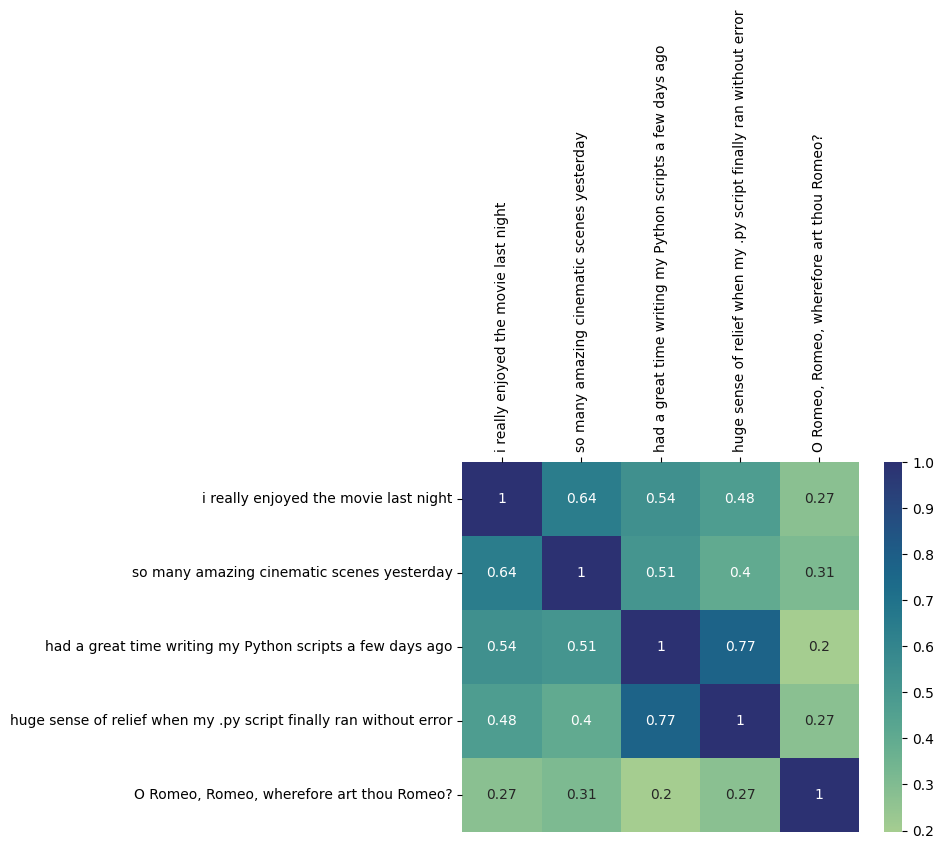

In [ ]:
ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Code generation with Gemini-pro


The code generation model (Codey) from PaLM API that you will use in this notebook is code-bison@001. It is fine-tuned to follow natural language instructions to generate required code and is suitable for a variety of coding tasks, such as:

- writing functions
- writing classes
- web-apges
- unit tests
- docstrings
- code translations, and many more use-cases.

Currently it supports the following languages:
- C++
- C#
- Go
- GoogleSQL
- Java
- JavaScript
- Kotlin
- PHP
- Python
- Ruby
- Rust
- Scala
- Swift
- TypeScript

You can find our more details [here](https://cloud.google.com/vertex-ai/docs/generative-ai/code/code-models-overview).

### Load model

In [ ]:
code = genai.GenerativeModel(
  model_name="gemini-1.5-pro",
  generation_config=generation_config,
)

### Hello Codey

In [ ]:
prompt = "write a python function to do binary search"

response = code.generate_content(prompt)
print(response.text)

```python
def binary_search(array, target):
  """
  Performs binary search on a sorted array to find the index of a target value.

  Args:
    array: The sorted array to search.
    target: The value to search for.

  Returns:
    The index of the target value in the array if found, otherwise -1.
  """

  left = 0
  right = len(array) - 1

  while left <= right:
    mid = (left + right) // 2  # Calculate middle index

    if array[mid] == target:
      return mid  # Target found at mid index
    elif array[mid] < target:
      left = mid + 1  # Search right half
    else:
      right = mid - 1  # Search left half

  return -1  # Target not found in the array

```


### Try out your own prompt

Some examples:
* write Go program to extract ip addresses from the text file
* write Java program that can extract pincodes from addresses
* write a standard SQL function that strips all non-alphabet characters from the string and encodes it to utf-8

In [ ]:
prefix = """write a python function named as "calculate_cosine_similairty" and three unit \
            tests where it takes two arguments "vector1" and "vector2". \
            It then uses numpy dot function to calculate the dot product of the two vectors. \n
          """

response = code.generate_content(prefix)
print(response.text)

```python
import numpy as np

def calculate_cosine_similarity(vector1, vector2):
  """
  Calculates the cosine similarity between two vectors.

  Args:
    vector1: A list or NumPy array representing the first vector.
    vector2: A list or NumPy array representing the second vector.

  Returns:
    The cosine similarity between the two vectors, a scalar value between -1 and 1.
  """

  vector1 = np.array(vector1)
  vector2 = np.array(vector2)

  dot_product = np.dot(vector1, vector2)
  norm_vector1 = np.linalg.norm(vector1)
  norm_vector2 = np.linalg.norm(vector2)

  if norm_vector1 == 0 or norm_vector2 == 0:
    return 0.0  # Handle cases


### Prompt templates

Prompt templates are useful if you have found a good way to structure your prompt that you can re-use. This can be also be helpful in limiting the open-endedness of freeform prompts. There are many ways to implement prompt templates, and below is just one example using f-strings. This way you can structure the prompts as per the expected funcationality of the code.

In [ ]:
language = "C++ function"
file_format = "json"
extract_info = "names"
requirments = """
              - the name should be start with capital letters.
              - There should be no duplicate names in the final list.
              """

prefix = f"""Create a {language} to parse {file_format} and extract {extract_info} with the following requirements: {requirments}.
              """

response = code.generate_content(prefix)
print(response.text)

```cpp
#include <iostream>
#include <string>
#include <vector>
#include <set>
#include <cctype>

#include "json.hpp" // Assuming you are using nlohmann/json library

// Function to extract names from JSON
std::set<std::string> extractNamesFromJson(const std::string& jsonString) {
    // Result set to store unique names
    std::set<std::string> names;

    // Parse the JSON string
    nlohmann::json jsonData = nlohmann::json::parse(jsonString);

    // Iterate through the JSON object (assuming names are values)
    for (const auto& [key, value] : jsonData.items()) {
        std::string name = value.get<std::string>();

        // Check if the first character is uppercase
        if (std::isupper(name[0])) {



## Code completion with `gemini-pro`

Code completion API has few more parameters than code generation.

* prefix: *required* : For code models, prefix represents the beginning of a piece of meaningful programming code or a natural language prompt that describes code to be generated.

* suffix: *optional* : For code completion, suffix represents the end of a piece of meaningful programming code. The model attempts to fill in the code in between the prefix and suffix.

* temperature:  *required* : Temperature controls the degree of randomness in token selection. Same as for other models. range: (0.0 - 1.0, default 0)

* maxOutputTokens: *required* : Maximum number of tokens that can be generated in the response. **range: (1 - 64, default 64)**

* stopSequences: *optional*  : Specifies a list of strings that tells the model to stop generating text if one of the strings is encountered in the response. The strings are case-sensitive.

In [ ]:
generation_config = {
    "temperature": 0.3,
    "max_output_tokens": 64,
    "top_p": 0.8,
    "top_k": 40,
    "response_mime_type": "text/plain",
}
prefix = """
          def find_x_in_string(string_s, x):
         """

response = code.generate_content(prefix)
print(response.text)

```python
def find_x_in_string(string_s, x):
  """
  This function checks if a given character 'x' is present in a string 'string_s'.

  Args:
    string_s: The string to search within.
    x: The character to search for.

  Returns:
    True if the character is found in the string, False otherwise.
  """
  for char in string_s:
    if char == x:
      return True
  return False

```



In [ ]:
prefix = """
         def reverse_string(s):
            return s[::-1]
         def test_empty_input_string()
         """

response = code.generate_content(prefix)
print(response.text)

```python
         def reverse_string(s):
            return s[::-1]
         
         def test_empty_input_string():
             assert reverse_string("") == ""
```


#### CodeChat

The with gemini you can code chat with you model lets you have a freeform conversation across multiple turns from a code context. The application tracks what was previously said in the conversation. As such, if you expect to use conversations in your application for code generation.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro')
chat = model.start_chat()

print(chat.send_message(
    "Please help write a function to calculate the min of two numbers"
).text)

```python
def min_of_two(num1, num2):
  """
  This function takes two numbers as input and returns the smaller one.

  Args:
      num1: The first number.
      num2: The second number.

  Returns:
      The smaller of the two input numbers.
  """

  if num1 < num2:
    return num1
  else:
    return num2

# Example usage
number1 = 15
number2 = 6
minimum = min_of_two(number1, number2)
print(f"The minimum of {number1} and {number2} is: {minimum}")
```

**Explanation:**

1. **Function Definition:**
   - `def min_of_two(num1, num2):` defines a function named `min_of_two` that accepts two parameters, `num1` and `num2`.

2. **Comparison:**
   - `if num1 < num2:` checks if the value of `num1` is less than `num2`.

3. **Returning the Smaller Number:**
   - If the condition in the `if` statement is true (`num1` is smaller), the function returns `num1`.
   - `else:`: If the condition is false, it means `num2` is smaller or equal, so the function returns `num2`.

4. **Example Usage:**
   - The c

As shown below, the model should respond based on what was previously asked in the conversation:

In [ ]:
print(chat.send_message(
        "can you explain the code line by line in bullets?",
    ).text
)

Here's a line-by-line explanation of the code:

**1. `def min_of_two(num1, num2):`**
   - **`def` Keyword:** This line starts with the `def` keyword, indicating that we are defining a new function.
   - **Function Name:**  `min_of_two` is the name we've chosen for this function. Choose a descriptive name that reflects what the function does.
   - **Parameters (Input):** The names within the parentheses, `num1` and `num2`, are the parameters of the function. These act as placeholders for the actual values that will be passed to the function when it's called.
   - **Colon:** The colon `:` at the end of the line is essential and marks the beginning of the function's code block.

**2. `  """`**
   - **Docstring (Documentation):** The triple quotes (`"""`) begin a docstring.  Docstrings are used to document your code. They are particularly helpful for others (and yourself in the future) to understand what the function does.
   - **Function Description:** This part of the docstring should co

You can take another example and ask the model to give more general code suggestion for a specific problem that you are working on.

In [ ]:
print(chat.send_message(
    "can you explain the code line by line in bullets?"
).text)

You got it! Here's the line-by-line explanation of the `min_of_two` function in bullet points, focusing on clarity:

**Inside the function definition:**

* **`def min_of_two(num1, num2):`**
    - **`def`:** This tells Python we're creating a new function.
    - **`min_of_two`:**  The name we've chosen for our function, making it easy to call later.
    - **`(num1, num2)`:** The parentheses hold the names `num1` and `num2`.  These are like temporary boxes inside the function. When we use the function, we'll put our actual numbers into these boxes.
    - **`:`:**  The colon signals the start of the instructions inside our function.

* **`  """`**
   - **Documentation:** This starts a multi-line comment, perfect for explaining what our function does in detail.

* **`  This function takes two numbers as input and returns the smaller one.`**
   - **Clear Purpose:** This line, part of our documentation, summarizes what the function does.

* **`  Args:`**
   - **Input Explanation:** This sect